In [5]:
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [8]:
# Load the data and split it between train and test sets

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

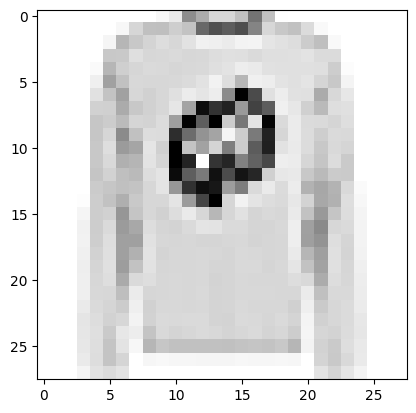

In [9]:
plt.imshow(x_train[123], cmap='Greys')

In [10]:
len(x_train[0][0])

28

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

In [14]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 11s 27ms/step - loss: 0.2833 - accuracy: 0.8972 - val_loss: 0.2660 - val_accuracy: 0.9012
Epoch 2/15
422/422 [==============================] - 12s 29ms/step - loss: 0.2781 - accuracy: 0.8981 - val_loss: 0.2602 - val_accuracy: 0.9047
Epoch 3/15
422/422 [==============================] - 11s 27ms/step - loss: 0.2739 - accuracy: 0.9007 - val_loss: 0.2590 - val_accuracy: 0.9088
Epoch 4/15
422/422 [==============================] - 11s 26ms/step - loss: 0.2656 - accuracy: 0.9047 - val_loss: 0.2555 - val_accuracy: 0.9092
Epoch 5/15
422/422 [==============================] - 11s 26ms/step - loss: 0.2656 - accuracy: 0.9020 - val_loss: 0.2645 - val_accuracy: 0.9017
Epoch 6/15
422/422 [==============================] - 11s 26ms/step - loss: 0.2603 - accuracy: 0.9047 - val_loss: 0.2498 - val_accuracy: 0.9095
Epoch 7/15
422/422 [==============================] - 11s 26ms/step - loss: 0.2601 - accuracy: 0.9043 - val_loss: 0.2471 - val_accuracy:

In [20]:
#TEST

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2554178833961487
Test accuracy: 0.9074000120162964


In [34]:
from sklearn.metrics import confusion_matrix

#generamos la prediccion
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

print(cm)


313/313 [==============================] - 1s 3ms/step
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
[[874   0  28  18   2   1  72   0   5   0]
 [  2 977   1  13   3   0   2   0   2   0]
 [ 14   0 898   7  34   0  46   0   1   0]
 [ 15   1  13 909  28   0  33   0   1   0]
 [  1   0  58  25 864   0  51   0   1   0]
 [  0   0   0   0   0 979   0  16   0   5]
 [134   1  93  19  90   0 653   0  10   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  3   1   7   0   3   2   3   1 980   0]
 [  0   0   0   0   0   5   0  35   1 959]]


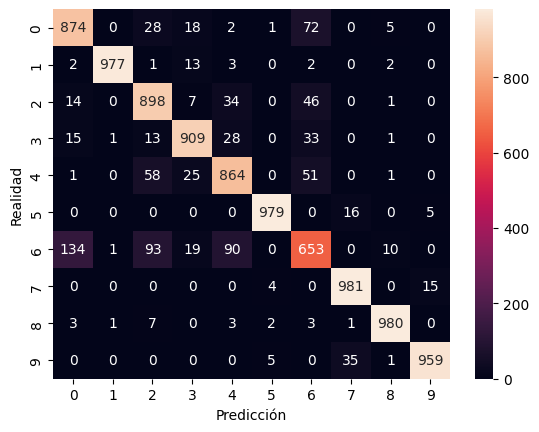

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

plt.show()

In [23]:
#TRAIN
score_train = model.evaluate(x_train, y_train, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.2554178833961487
Train accuracy: 0.9074000120162964


In [24]:
#Comparar resultados Test vs Train
import pandas as pd

columnas = ['loss', 'accuracy']
data_score= [ [score[0], score[1]], [score_train[0], score_train[1]] ]
df_resultados = pd.DataFrame(columns=columnas, data=data_score)

print(df_resultados)

       loss  accuracy
0  0.255418    0.9074
1  0.190486    0.9315


In [28]:
from sklearn.metrics import confusion_matrix

#generamos la prediccion
y_pred_train = model.predict(x_train)

y_test_train_class = np.argmax(y_train, axis=1)
y_pred_train_class = np.argmax(y_pred_train, axis=1)

cm_train = confusion_matrix(y_test_train_class, y_pred_train_class)

print(cm)

1875/1875 [==============================] - 5s 2ms/step
[[874   0  28  18   2   1  72   0   5   0]
 [  2 977   1  13   3   0   2   0   2   0]
 [ 14   0 898   7  34   0  46   0   1   0]
 [ 15   1  13 909  28   0  33   0   1   0]
 [  1   0  58  25 864   0  51   0   1   0]
 [  0   0   0   0   0 979   0  16   0   5]
 [134   1  93  19  90   0 653   0  10   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  3   1   7   0   3   2   3   1 980   0]
 [  0   0   0   0   0   5   0  35   1 959]]


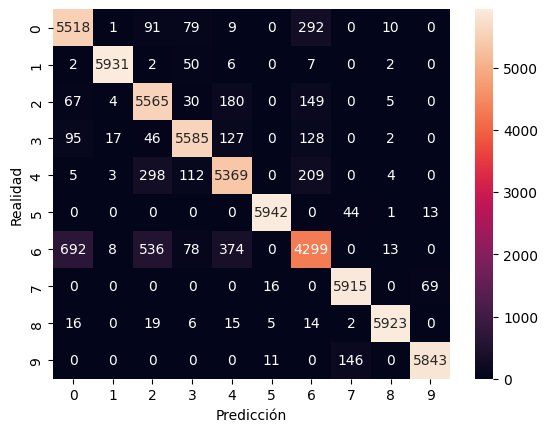

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

plt.show()